# Multi-class Classification

## Import Libraries

In [64]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import cv2  

Let's explore the `./dataset` folder containing the images. There is a subdirectory for each class. In this case there will be 17 folders one for each food label in the alphabet.

The complete tree looks like this:

```
.└── dataset/
    ├── train/
    |    ├── ayam/
    |    │   ├── ayam1.jpg
    |    │   ├── ayam2.jpg
    |    │   └── ...
    |    ├── brokoli/
    |        ├── brokoli1.jpg
    |        ├── brokoli2.jpg
    |        └── ...
    |    ├── ...
    |    ├── telur/
    |    |    ├── telur1.jpg
    |    |    ├── telur2.jpg
    |    |    └── ...
    |    ├── tomat/
    |    |    ├── tomat1.jpg
    |    |    ├── tomat2.jpg
    |    |    └── ...
    |    ├── ...
    |    └── wortel/
    |        ├── wortel1.jpg
    |        ├── wortel2.jpg
    |        └── ...
    └── validation/
    |    ├── ayam/
    |    │   ├── ayam1.jpg
    |    │   ├── ayam2.jpg
    |    │   └── ...
    |    ├── brokoli/
    |        ├── brokoli1.jpg
    |        ├── brokoli2.jpg
    |        └── ...
    |    ├── ...
    |    ├── telur/
    |    |    ├── telur1.jpg
    |    |    ├── telur2.jpg
    |    |    └── ...
    |    ├── tomat/
    |    |    ├── tomat1.jpg
    |    |    ├── tomat2.jpg
    |    |    └── ...
    |    ├── ...
    |    └── wortel/
    |        ├── wortel1.jpg
    |        ├── wortel2.jpg
    |        └── ...
    └── test/
         ├── ayam/
         │   ├── ayam1.jpg
         │   ├── ayam2.jpg
         │   └── ...
         ├── brokoli/
         ├    ├── brokoli1.jpg
         ├    ├── brokoli2.jpg
         ├    └── ...
         ├── ...
         ├── telur/
         |    ├── telur1.jpg
         |    ├── telur2.jpg
         |    └── ...
         ├── tomat/
         |    ├── tomat1.jpg
         |    ├── tomat2.jpg
         |    └── ...
         ├── ...
         └── wortel/
             ├── wortel1.jpg
             ├── wortel2.jpg
             └── ...
``` 

In [66]:
TRAIN_DIR = 'dataset_gray/train/'
VALIDATION_DIR = 'dataset_gray/validation/'
TEST_DIR = 'dataset_gray/test/'

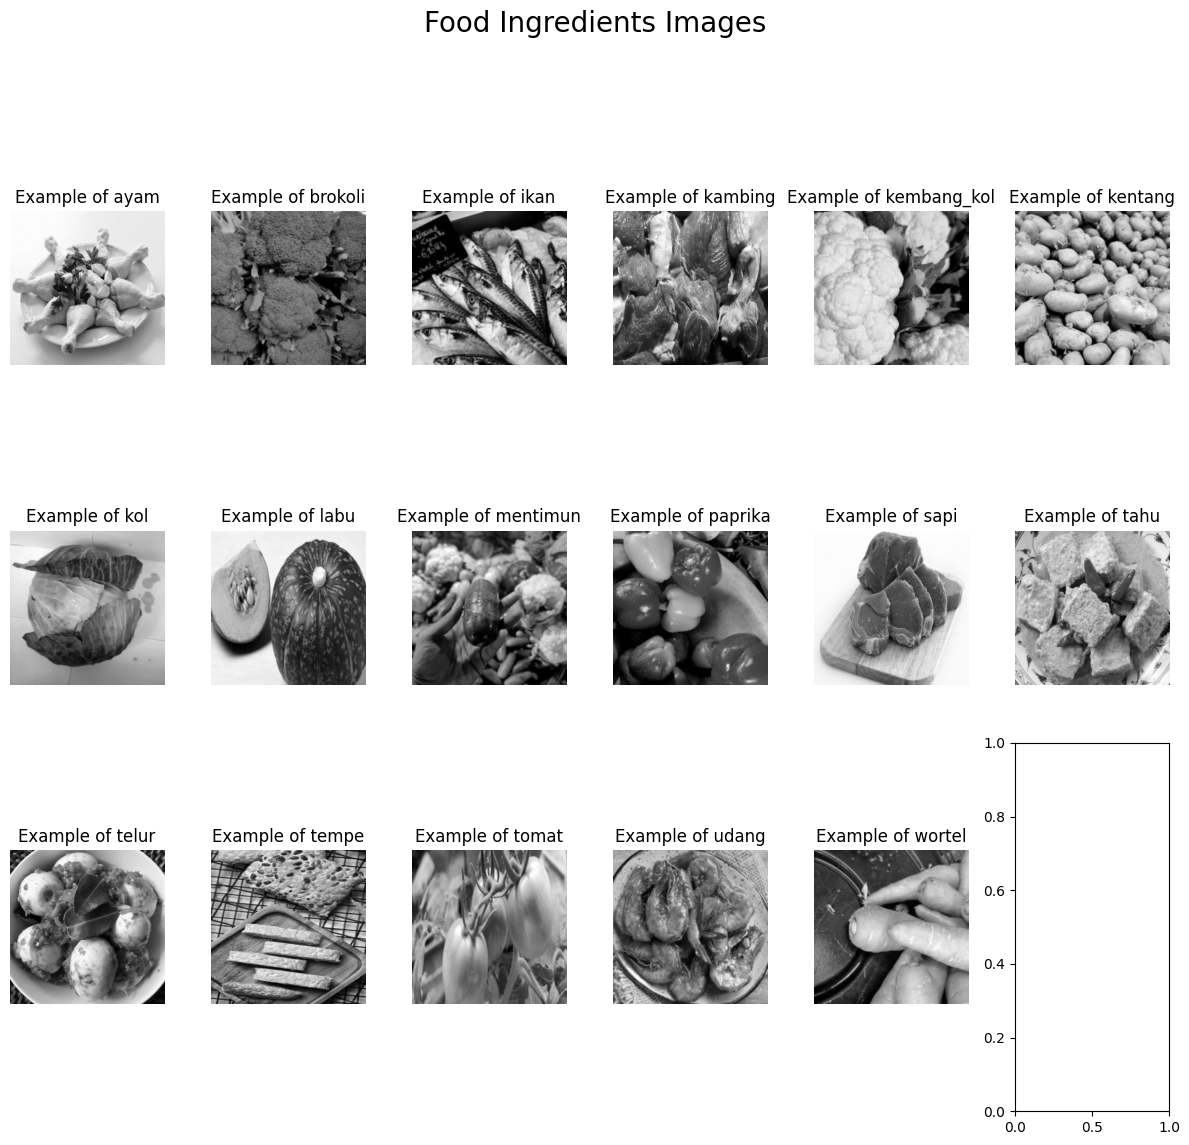

In [67]:
folder_names = os.listdir('./dataset_gray/train')

num_columns = 6 
num_rows = (len(folder_names) + num_columns - 1) // num_columns 

fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))
fig.suptitle('Food Ingredients Images', fontsize=20)

axes = axes.flatten()

for ii, folder in enumerate(folder_names):
    dir = f'./dataset_gray/train/{folder}'
    
    if os.listdir(dir):  
        img_path = os.path.join(dir, os.listdir(dir)[0]) 
        img = tf.keras.preprocessing.image.load_img(img_path)  
        axes[ii].imshow(img)
        axes[ii].set_title(f'Example of {folder}')  
        axes[ii].axis('off')
    else:
        axes[ii].set_title(f'No images in {folder}') 
        axes[ii].axis('off')  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Preprocessing Image

1) Changing into PNG format

In [68]:
def convert_and_clean_images(directory):
    for root, _, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            
            # Check if it is a file before attempting to open
            if os.path.isfile(filepath):
                try:
                    # Open the image in verify mode to check if it's valid
                    with Image.open(filepath) as img:
                        img.verify()  # Verify if it's a valid image

                    # Reopen in non-verify mode to manipulate
                    with Image.open(filepath) as img:
                        # Convert to RGB (JPEG doesn't support transparency)
                        img = img.convert('RGB')
                        
                        # New filename with .jpg extension
                        new_filename = os.path.splitext(filename)[0] + ".png"
                        new_filepath = os.path.join(root, new_filename)
                        
                        # Save as JPEG
                        img.save(new_filepath, "PNG")
                        print(f"Converted {filename} to PNG format as {new_filename}.")
                        
                        # Remove the original file if it was converted
                        if filename != new_filename:
                            os.remove(filepath)
                except (IOError, SyntaxError):
                    # If an error occurs, the image is likely unformatted or corrupted
                    print(f"Removing unformatted or corrupted image: {filename}")
                    os.remove(filepath)
            else:
                print(f"Skipping non-file entry: {filename}")



In [69]:
def renameFile(path):
    for root, _, files in os.walk(path):
        i = 1
        folder_name = os.path.basename(root)  # Extract the folder name (in this case "ayam")
        for filename in files:
            # Create a new filename based on the folder name
            new_filename = "image_" + folder_name +"_" +str(i) + ".png"
            old_file_path = os.path.join(root, filename)
            new_file_path = os.path.join(root, new_filename)
            
            print(new_file_path)  # Just to check the new filenames
            
            os.rename(old_file_path, new_file_path)
            print(f"Renamed: {old_file_path} -> {new_file_path}")
            
            i += 1  # Increment the counter for each file
            print(i)    


In [70]:
renameFile(TRAIN_DIR)
renameFile(VALIDATION_DIR)
renameFile(TEST_DIR)

dataset_gray/train/ayam\image_ayam_1.png
Renamed: dataset_gray/train/ayam\image_ayam_1.png -> dataset_gray/train/ayam\image_ayam_1.png
2
dataset_gray/train/ayam\image_ayam_2.png


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'dataset_gray/train/ayam\\image_ayam_10.png' -> 'dataset_gray/train/ayam\\image_ayam_2.png'

In [10]:
# Replace with the path to your directory
convert_and_clean_images(TEST_DIR)
convert_and_clean_images(TRAIN_DIR)
convert_and_clean_images(VALIDATION_DIR)

Converted image_ayam_1.png to PNG format as image_ayam_1.png.
Converted image_ayam_10.png to PNG format as image_ayam_10.png.
Converted image_ayam_11.png to PNG format as image_ayam_11.png.
Converted image_ayam_12.png to PNG format as image_ayam_12.png.
Converted image_ayam_13.png to PNG format as image_ayam_13.png.
Converted image_ayam_14.png to PNG format as image_ayam_14.png.
Converted image_ayam_15.png to PNG format as image_ayam_15.png.
Converted image_ayam_16.png to PNG format as image_ayam_16.png.
Converted image_ayam_17.png to PNG format as image_ayam_17.png.
Converted image_ayam_18.png to PNG format as image_ayam_18.png.
Converted image_ayam_19.png to PNG format as image_ayam_19.png.
Converted image_ayam_2.png to PNG format as image_ayam_2.png.
Converted image_ayam_20.png to PNG format as image_ayam_20.png.
Converted image_ayam_21.png to PNG format as image_ayam_21.png.
Converted image_ayam_22.png to PNG format as image_ayam_22.png.
Converted image_ayam_23.png to PNG format as

In [71]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [72]:
def is_image_corrupt(filepath):
    try:
        # Attempt to open the image file
        with Image.open(filepath) as img:
            img.verify()  # Verify the image
        return False  # If no exception, the image is not corrupt
    except (IOError, SyntaxError) as e:
        print(f"Corrupt image detected: {filepath} - Error: {e}")
        return True  # The image is corrupt

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                filepath = os.path.join(root, filename)
                if is_image_corrupt(filepath):
                    print(f"Corrupt image: {filepath}")


In [6]:
# Replace with the path to your main directory
check_images_in_directory(TEST_DIR)
check_images_in_directory(TRAIN_DIR)
check_images_in_directory(VALIDATION_DIR)

In [73]:
sample_array[0,:5]

array([[64., 64., 64.],
       [63., 63., 63.],
       [67., 67., 67.],
       [78., 78., 78.],
       [95., 95., 95.]], dtype=float32)

2) Convert to Grayscale Image, Resizing

In [12]:
def convert_image_to_grayscale(path):
    try: 
        for root, _, files in os.walk(path):
            for filename in files:
                filepath = os.path.join(root, filename)
                img = cv2.imread(filepath)  # Open the image using OpenCV
                
                if img is None:
                    print(f"Failed to load image: {filepath}")  # Print an error message if the image can't be loaded
                    continue
                
                # Convert to grayscale
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Normalize the grayscale image
                normalized_img = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX)
                # Resize the image
                resized_img = cv2.resize(normalized_img, (300, 300))
                # Save the processed image back to the same path
                cv2.imwrite(filepath, resized_img)
    except Exception as e:
        print("An error occurred:", e)

In [13]:
convert_image_to_grayscale(TEST_DIR)
convert_image_to_grayscale(TRAIN_DIR)
convert_image_to_grayscale(VALIDATION_DIR)

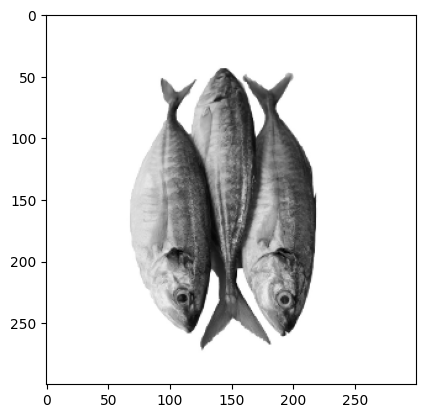

In [75]:
img = cv2.imread("dataset_gray/train/ikan/image_ikan_2.png")
plt.imshow(img)

## Creating the datasets for the CNN

In [76]:
def train_val_datasets():
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(150, 150),
		label_mode='categorical',
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(150, 150),
		label_mode='categorical',
    ) 

    test_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TEST_DIR,
        batch_size=32,
        image_size=(150, 150),
		label_mode='categorical',
    ) 
    return train_dataset, validation_dataset, test_dataset

In [77]:
# Create train and validation datasets
train_dataset, validation_dataset,test_dataset = train_val_datasets()
print()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print()
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   
print()
print(f"Images of test dataset have shape: {test_dataset.element_spec[0].shape}")
print(f"Labels of test dataset have shape: {test_dataset.element_spec[1].shape}")   

Found 8380 files belonging to 17 classes.
Found 2791 files belonging to 17 classes.
Found 2802 files belonging to 17 classes.

Images of train dataset have shape: (None, 150, 150, 3)
Labels of train dataset have shape: (None, 17)

Images of validation dataset have shape: (None, 150, 150, 3)
Labels of validation dataset have shape: (None, 17)

Images of test dataset have shape: (None, 150, 150, 3)
Labels of test dataset have shape: (None, 17)


## Coding the CNN

In [93]:
def create_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape=(150, 150, 3)), 
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(17, activation='softmax')
        ]) 
    
    model.compile(optimizer = tf.optimizers.Adam(learning_rate=1e-3),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [94]:
model = create_model()

In [95]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 150, 150, 3)
Output shape: (None, 17)


In [96]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    44,859,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,863,505 (171.14 MB)

 Trainable params: 44,863,505 (171.14 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels
	
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 17)


In [98]:
for element in train_dataset.take(1):
    print(element)


(<tf.Tensor: shape=(32, 150, 150, 3), dtype=float32, numpy=
array([[[[ 99.25,  99.25,  99.25],
         [105.  , 105.  , 105.  ],
         [107.5 , 107.5 , 107.5 ],
         ...,
         [ 53.5 ,  53.5 ,  53.5 ],
         [ 51.  ,  51.  ,  51.  ],
         [ 47.5 ,  47.5 ,  47.5 ]],

        [[116.5 , 116.5 , 116.5 ],
         [121.  , 121.  , 121.  ],
         [119.  , 119.  , 119.  ],
         ...,
         [ 53.  ,  53.  ,  53.  ],
         [ 50.5 ,  50.5 ,  50.5 ],
         [ 46.5 ,  46.5 ,  46.5 ]],

        [[132.5 , 132.5 , 132.5 ],
         [137.  , 137.  , 137.  ],
         [132.  , 132.  , 132.  ],
         ...,
         [ 49.5 ,  49.5 ,  49.5 ],
         [ 45.5 ,  45.5 ,  45.5 ],
         [ 40.5 ,  40.5 ,  40.5 ]],

        ...,

        [[137.  , 137.  , 137.  ],
         [138.  , 138.  , 138.  ],
         [138.25, 138.25, 138.25],
         ...,
         [  1.  ,   1.  ,   1.  ],
         [  0.75,   0.75,   0.75],
         [  0.5 ,   0.5 ,   0.5 ]],

        [[138.25, 138.

# Train your model

In [99]:
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.2097 - loss: 6.1950WARNING:tensorflow:5 out of the last 356 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000001EAF4078AF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
262/262 ━━━━━━━━━━━━━━━━━━━━ 162s 615ms/step - accuracy: 0.2102 - loss: 6.1830 - val_accuracy: 0.5242 - val_loss: 1.7096
Epoch 2/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 164s 625ms/step - accuracy: 0.6012 

KeyboardInterrupt: 

In [ ]:

def load_and_preprocess_image(path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)  # Mengubah ke float32
        return img
    except tf.errors.InvalidArgumentError:
        return None  # Mengembalikan None jika gambar tidak valid

def get_image_dataset(directory):
    file_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    dataset = tf.data.Dataset.from_tensor_slices(file_paths)
    dataset = dataset.map(load_and_preprocess_image)  # Memuat dan memproses gambar
    dataset = dataset.filter(lambda img: img is not None)  # Menghapus gambar yang tidak valid
    return dataset

# Contoh penggunaan
train_dataset = get_image_dataset('./dataset/train/ayam')
